In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [7]:
df = pd.read_csv('all_data.csv')

### Review information about my data. Check data types,\ 
### count of types of variables, and check for incomplete data.
print(df.head())
print(df.dtypes)
print(df.nunique())
print(df.isna().sum())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


In [7]:
# Goal: Create a life expectancy graph for each of the countries by year and by GDP. 
# Sub goal: clean GDP data to remove e+10 and decimals
# Graph: Scatter plot of year vs. life expectancy in individual graphs
# Graph: Scatter plot of GDP vs. life expectancy in individual graphs
# Graph: Overlay of single graph with scatter plots of both graphs


In [8]:
#clean data
df.rename(columns={'Life expectancy at birth (years)': 'Life'}, inplace = True)
df['GDP_Clean'] = df.apply(lambda row: row['GDP']/ 1e12, axis=1)
#df['GDP_Clean'] = df['GDP'].astype('str').str[0:3]
df['Country'] = df.replace('United States of America', 'USA')
print(df.head())

  Country  Year  Life           GDP  GDP_Clean
0   Chile  2000  77.3  7.786093e+10   0.077861
1   Chile  2001  77.3  7.097992e+10   0.070980
2   Chile  2002  77.8  6.973681e+10   0.069737
3   Chile  2003  77.9  7.564346e+10   0.075643
4   Chile  2004  78.0  9.921039e+10   0.099210


[[1.         0.98054329]
 [0.98054329 1.        ]]
[[1.         0.98273382]
 [0.98273382 1.        ]]
[[1.         0.98737698]
 [0.98737698 1.        ]]
[[1.         0.95045137]
 [0.95045137 1.        ]]
[[1.         0.99231165]
 [0.99231165 1.        ]]
[[1.         0.92392436]
 [0.92392436 1.        ]]


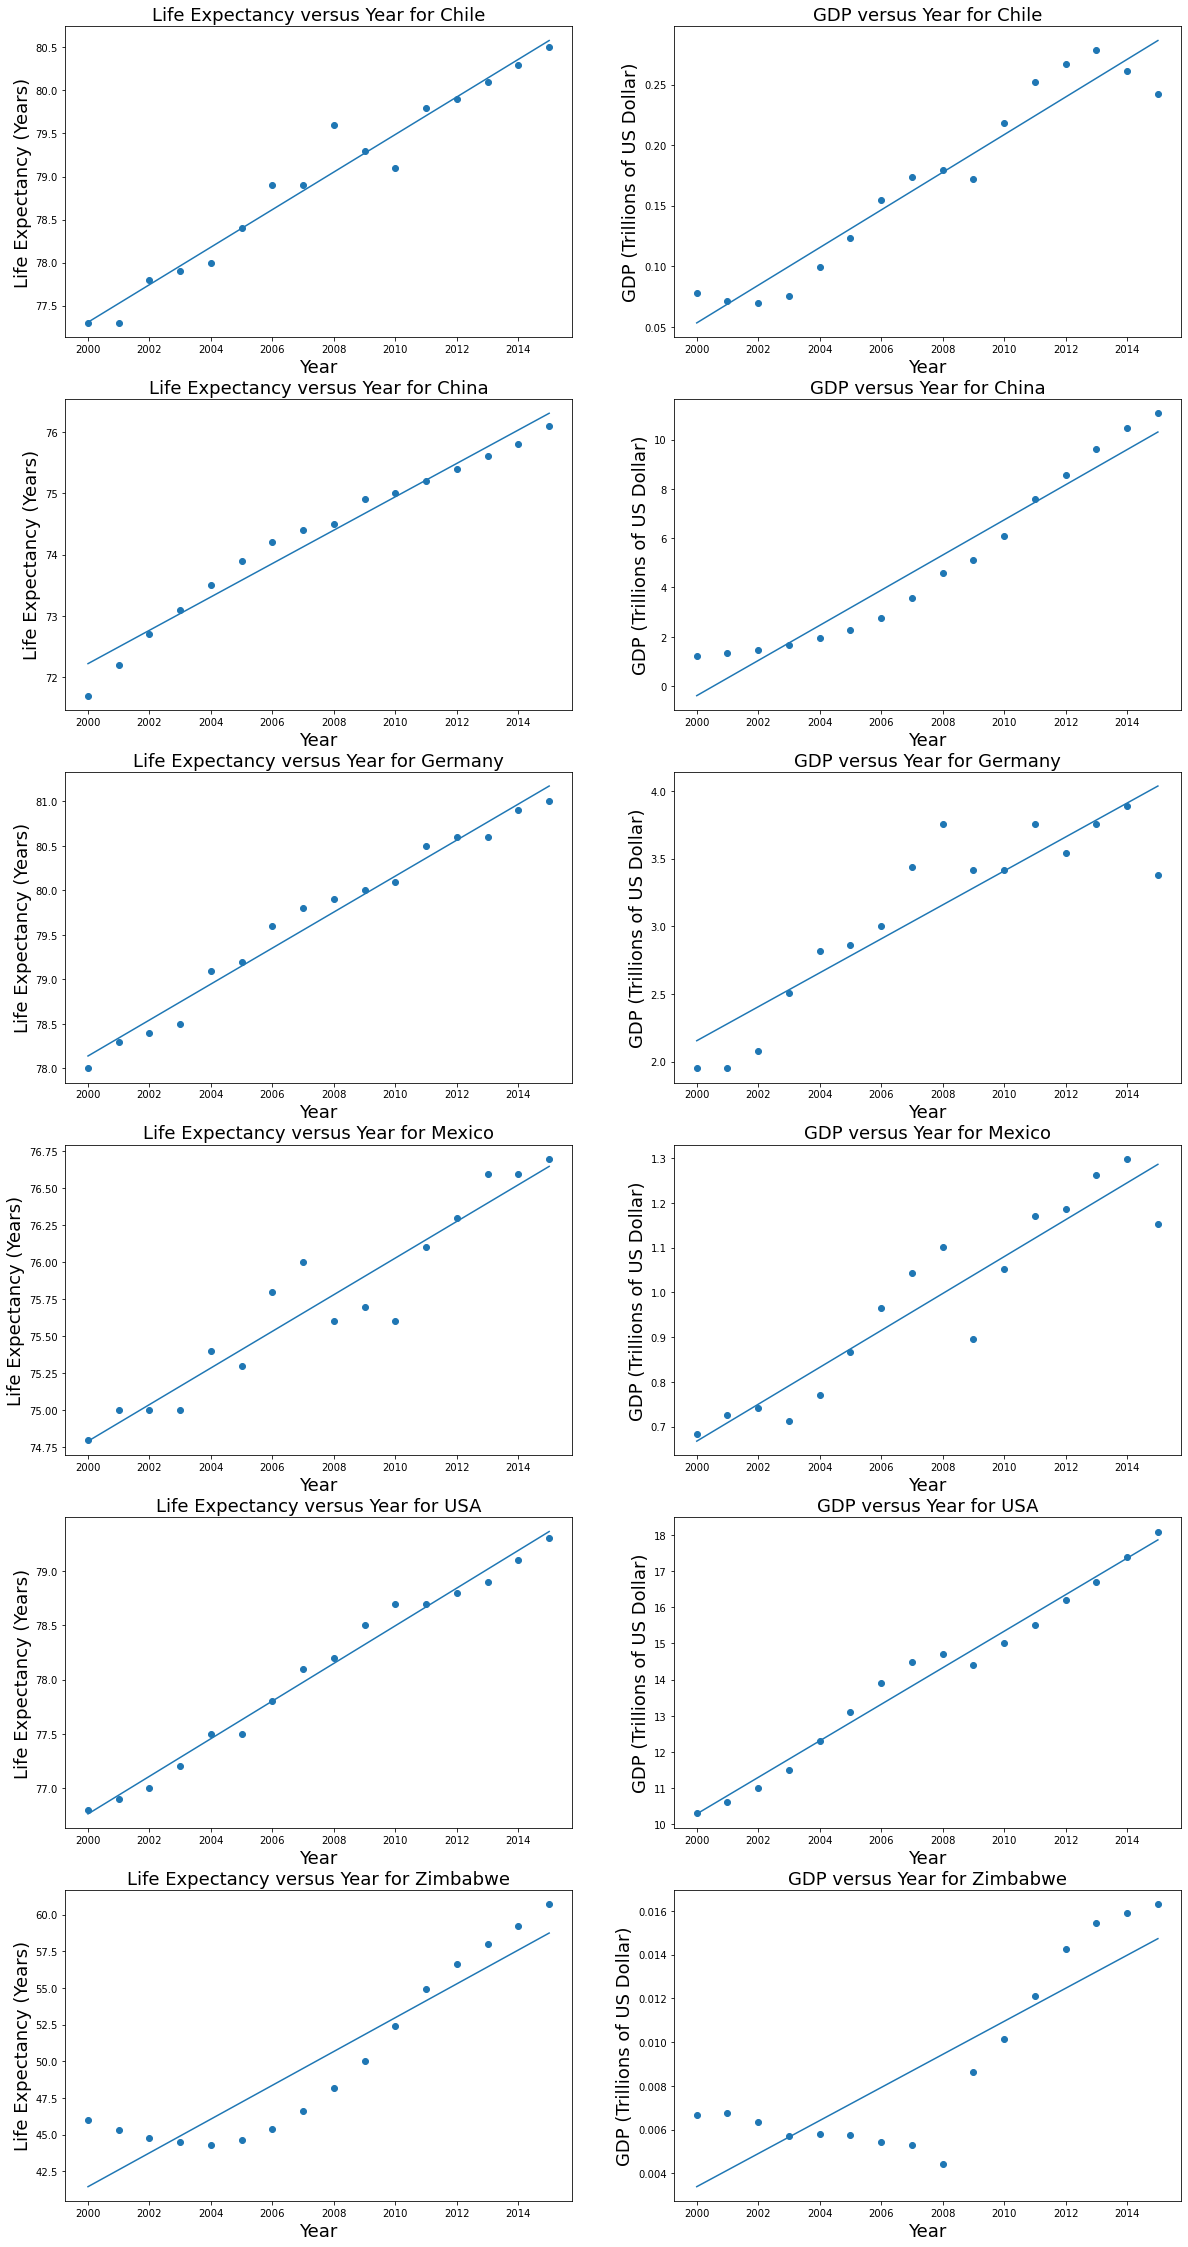

In [14]:
# Function for printing and scatter plotting life expectancy versus year
def year_life(ax, country_name):
    #pass country name and life expectancy to scatter plot function
    x_val = df.Year[df.Country == country_name]
    y_val = df.Life[df.Country == country_name]
    plt.scatter(x= x_val, y= y_val)
    slope, intercept, r, p, stderr = scipy.stats.linregress(x_val, y_val)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    ax.plot(x_val, intercept + slope * x_val, label=line)
    plt.title('Life Expectancy versus Year for ' + country_name, fontsize = 18)
    ax.set_ylabel('Life Expectancy (Years)', fontsize = 18)
    ax.set_xlabel('Year', fontsize = 18)
    print('Pearson for Life Expectancy for ' + country_name)
    print(np.corrcoef(x_val, y_val))

# Function for printing and scatter plotting GDP versus year
def year_gdp(ax, country_name):
    #pass country name and GDP to scatter plot function
    plt.scatter(x= df.Year[df.Country == country_name], y= df.GDP_Clean[df.Country == country_name])
    slope, intercept, r, p, stderr = scipy.stats.linregress(df.Year[df.Country == country_name], df.GDP_Clean[df.Country == country_name])
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    ax.plot(df.Year[df.Country == country_name], intercept + slope * df.Year[df.Country == country_name], label=line)
    plt.title('GDP versus Year for ' + country_name, fontsize = 18)
    ax.set_ylabel('GDP (Trillions of US Dollar)', fontsize = 18)
    ax.set_xlabel('Year', fontsize = 18)

    print('Pearson for GDP for ' + country_name)
    print(np.corrcoef(x_val, y_val))
    
def plot_spread(dataframe):
    length = df.Country.nunique()
    ax = ['ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10', 'ax11', 'ax12']
    x = 1

    # loop through the countries and print out both plots for each country
    plt.figure(figsize=(20,40))
    for country in df.Country.unique().tolist():
        for y in range(2):
            if y == 0:
                val1 = x
                ax[val1] = plt.subplot(length, 2, val1)
                year_life(ax[val1], country)
                x+=1
            else: 
                val2 = x
                ax[val2] = plt.subplot(length, 2, val2)
                year_gdp(ax[val2], country)
                x+=1 
        
plot_spread(df)
plt.savefig('gdp_scatter.png')

In [ ]:
"""conclusion: Each of the contries reviewed had a life expectancy growth independent of their GDP.
There is no lag in life expectancy when GDP plateaus or declines. Life expectancy isn't correlated to GDP. 
The best indicator of the next years value is the prior years values. 

As for process, I cleaned up the data to make it easier to read in the graphs.
I created several functions to make it easier to make the two plots side by side and minimize the code.
I needed to create an array of ax items to allow for creating each subplot. Otherwise, there is a repeated subplot error. 
"""



Pearson for GDP and life expectancy for Chile
[[1.         0.94987667]
 [0.94987667 1.        ]]
Pearson for GDP and life expectancy for China
[[1.         0.90852554]
 [0.90852554 1.        ]]
Pearson for GDP and life expectancy for Germany
[[1.        0.9326989]
 [0.9326989 1.       ]]
Pearson for GDP and life expectancy for Mexico
[[1.         0.93223772]
 [0.93223772 1.        ]]
Pearson for GDP and life expectancy for USA
[[1.         0.98170924]
 [0.98170924 1.        ]]
Pearson for GDP and life expectancy for Zimbabwe
[[1.        0.9661999]
 [0.9661999 1.       ]]


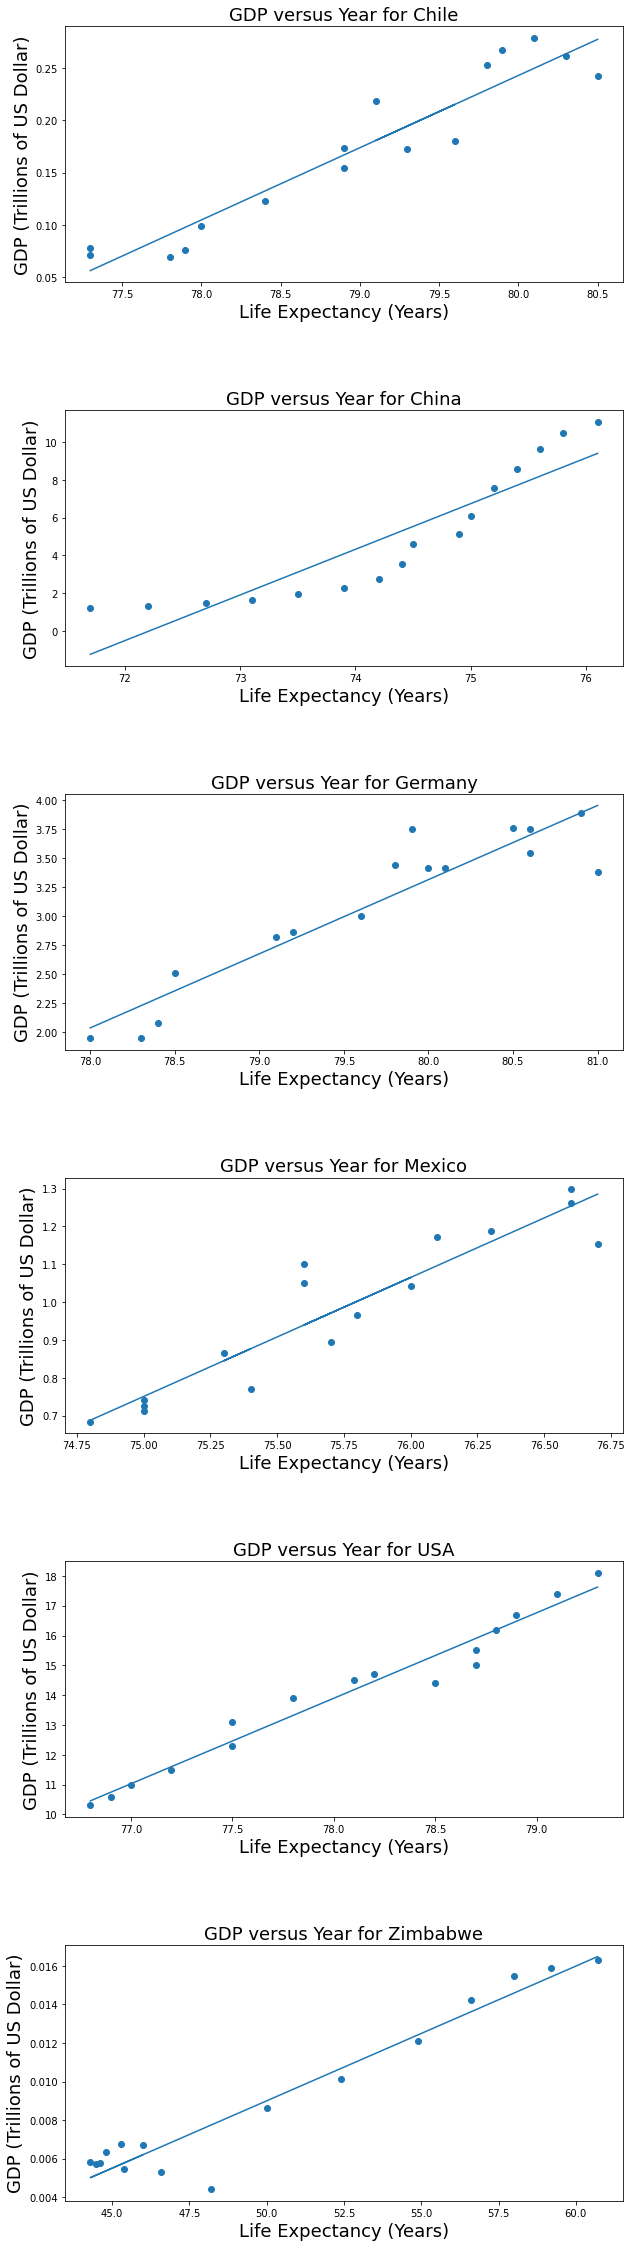

In [18]:
plt.figure(figsize=(10,40))
plt.subplots_adjust(hspace = .5)
count = 1
ax2 = ['ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7']

for country_name in df.Country.unique().tolist():   
    ax2[count] = plt.subplot(6, 1, count)
    x_val  = df.Life[df.Country == country_name]
    y_val = df.GDP_Clean[df.Country == country_name]
    plt.scatter(x= x_val, y= y_val)
    slope, intercept, r, p, stderr = scipy.stats.linregress(x_val, y_val)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    plt.plot(x_val, intercept + slope * x_val, label=line)
    plt.title('GDP versus Year for ' + country_name, fontsize = 18)
    ax2[count].set_ylabel('GDP (Trillions of US Dollar)', fontsize = 18)
    ax2[count].set_xlabel('Life Expectancy (Years)', fontsize = 18)
    count += 1
    
    print('Pearson for GDP and life expectancy for ' + country_name)
    print(np.corrcoef(x_val, y_val))
    
plt.savefig('gdp_and_life_scatter.png')

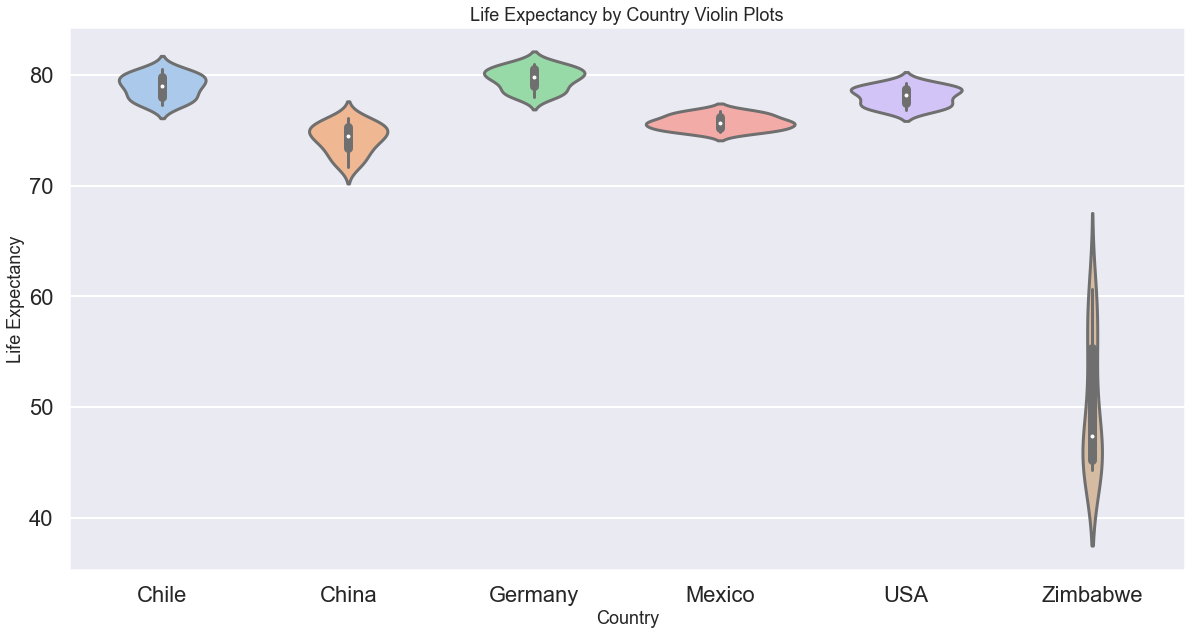

In [20]:
# Create a violin plot of life expectancy
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.set_context('poster')
sns.violinplot(data=df, x='Country', y='Life')
plt.ylabel('Life Expectancy', fontsize = 18)
plt.xlabel('Country', fontsize = 18)
plt.title('Life Expectancy by Country Violin Plots', fontsize = 18)

plt.savefig('life_violin.png')

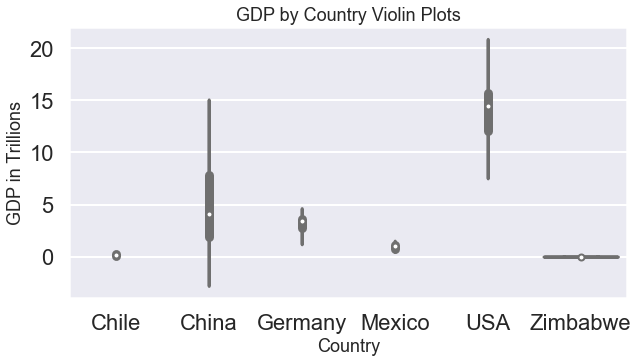

In [21]:
# Create a violin plot of GDP
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.violinplot(data=df, x='Country', y='GDP_Clean')
sns.set_context('poster')
plt.ylabel('GDP in Trillions', fontsize = 18)
plt.xlabel('Country', fontsize = 18)
plt.title('GDP by Country Violin Plots', fontsize = 18)

plt.savefig('GDP_violin.png')
